# Social Network Analysis - Exercise Sheet 2

## Exercise 2a: Split Graphs
Networks often consist of "tightly knit cores" and a loosely connected periphery. A graph $G = (V,E)$ is called a *split graph*, iff G is complete or there exists a partition $\mathcal{V}=\{C,P\}$ of $V$ with $V=C\cup P$, such that
- $C$ is a clique, and
- $P$ is an *independent set*, i.e., $G[P]$ has no edges. 
In this exercise, your task is to find maximal split graphs in a given graph, i.e., which are maximal in their core or periphery size.

### Exercise
Throughout this exercise, we will work with split graphs as triples (G,C,P), where G is the split graph (a *networkx* graph) and C and P are lists of core and periphery nodes (e.g., integers).
1. Implement the method `assert_split_graph` which, for a given triple $(G,C,P)$ ensures that G is a split graph with core C and periphery P. Implement this method using Python's *assert* statement. Use error messages, which explain why a given triple is not a split graph, in case a test fails.
- Implement the method `generate_split_graph`, which generates a split graph with a given core- and periphery size. Periphery nodes should be connected randomly to core nodes.
- Implement the method `plot_split_graph`, which draws a split graph.
    - Ensure that core and periphery can be distinguished well in the visualization.
    - Experiment with the different drawing method of networkx to find a suitable drawing. https://networkx.org/documentation/stable/reference/drawing.html
    - If the parameter draw_subgraphs is set to True, the method should draw two additional plots for the subgraphs induced by core and periphery.
    - Your plots only need to visualize relatively small graphs (i.e., with less than 50 nodes).
- Implement the method `find_split_graphs`. For an input graph $G=(V,E)$, (which itself is not necessarily a split graph) this method finds all split graphs $G[C \cup P]$ with the following properties:
    - $C$ is a maximal clique of the input graph.
    - There is no larger (superset) periphery than $P$ in the input graph with regard to the given $C$.
- Find a network from your daily life that is (or contains) a split graph. Visualize this network and explain what insights you gain from its core and periphery.

### Hints
* Submit your code zipped via [moodle](https://moodle.uni-kassel.de/course/view.php?id=18460) until 15.06.2025 23:55 MEZ
* You can use the [NetworkX](https://networkx.github.io/documentation/stable/) library. In particular, you can use it for computing maximal cliques.
* Ensure that your graphs do not have self-loops, using the provided method.
* Below the Implementation section is a Test section that can be used to check your code.



### Implementation
Implement your solution in this section.
Use the predefined methods.
You can add more methods if you want.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random


def remove_self_loops(G):
    """
    Modifies a graph G such that all self-loops are removed.
    Returns G.
    """
    G.remove_edges_from(nx.selfloop_edges(G))
    return G


def print_info(G, C, P):
    """
    Prints some info about a given split graph.
    """
    # Print some info about this graph.
    print(f"Size of the split graph: {len(G)}")
    print(f"Core (size {len(C)}): {C} ")
    print(f"Periphery (size {len(P)}): {P}")


def assert_split_graph(G, C, P):
    """Ensures that G is a split graph with Core C and periphery P"""
    
    assert set(C).isdisjoint(P), "C and P aren't disjoint."
    assert set(C).union(P) == set(G.nodes), "C and P don't cover all nodes in G."
    assert C.size() == C.number_of_nodes() * (C.number_of_nodes() - 1) / 2, "C is no Core"
    assert P.size() == 0, "P is no periphery"
    
    return True


def generate_split_graph(C_size, P_size):
    """
    Generates a split graph G which has a core C with C_size nodes and a periphery P of P_size nodes.
    Connections between core and periphery are random.
    Returns the triple (G, C, P).
    """
    C = list(range(C_size))
    P = list(range(C_size, C_size + P_size))

    # core
    G = nx.complete_graph(C_size)

    # periphery
    for p in P:
        c = random.choice(C)
        G.add_edge(p, c)
    G.add_nodes_from(P)

    return G, G.subgraph(C), G.subgraph(P)


def plot_split_graph(G, C, P, draw_subgraphs=True):
    """
    Plots a split graph G with core C and periphery P.
    If draw_subraphs is true, draws two additional plots, one for
    the subgraph of G induced by the core and one for the periphery.
    """
    assert_split_graph(G, C, P)
    plt.figure(1)

    # plot core on top and periphery at low
    pos = {}
    for i in range(C.number_of_nodes()):
        pos[i] = (i, 1)
    for i in range(C.number_of_nodes(),G.number_of_nodes()):
        pos[i] = (i - C.number_of_nodes(), 0)
    
    nx.draw(G, pos=pos)

    if draw_subgraphs:
        plt.figure(2)
        nx.draw(C)
        plt.figure(3)
        nx.draw(P)

    plt.show()


def find_split_graphs(inputGraph):
    """
    Returns a list of triples (G,C,P), s.t. each G is a split graph with core C and periphery p.
    Only returns split graphs s.t. C is a maximal clique in the input graph, i.e., it is not possible
    to add a further node v from the input graph to C while maintaining the clique property
    and there exists no other, larger maximal clique.
    Likewise, it is not possible to add a further node to P s.t. it is not connected to any of
    the other periphery nodes and there exists no other, larger periphery with regard to C.
    """
    split_graphs = []

    all_nodes = set(inputGraph.nodes())

    for C in nx.find_cliques(inputGraph):
        
        C = set(C)

        # Find candidate periphery nodes — not adjacent to any node in C
        P_candidates = set().union(*(inputGraph.neighbors(node) for node in C)) - C

        P = nx.approximation.maximum_independent_set(inputGraph.subgraph(P_candidates))
        G_CP = inputGraph.subgraph(C.union(P)).copy()

        split_graphs.append((G_CP, C, P))

    return split_graphs

### Testcases
Here you can test your methods. Please leave the tests unchanged. You can, however, add further tests, if you like.

In [2]:
# Generate a split graph.
mygraph = generate_split_graph(5, 15)

# The graph is a triple (G,C,P) that can be unpacked.
G, C, P = mygraph

# Print some info.
# The method-call below is equivalent to print_info(G, C, P).
print_info(*mygraph)

# Assert that mygraph is a split-graph with core C and partition P.
# If yes, nothing should happen. Otherwise, an error-message is shown.
assert_split_graph(*mygraph)

Size of the split graph: 20
Core (size 5): Graph with 5 nodes and 10 edges 
Periphery (size 15): Graph with 15 nodes and 0 edges


True

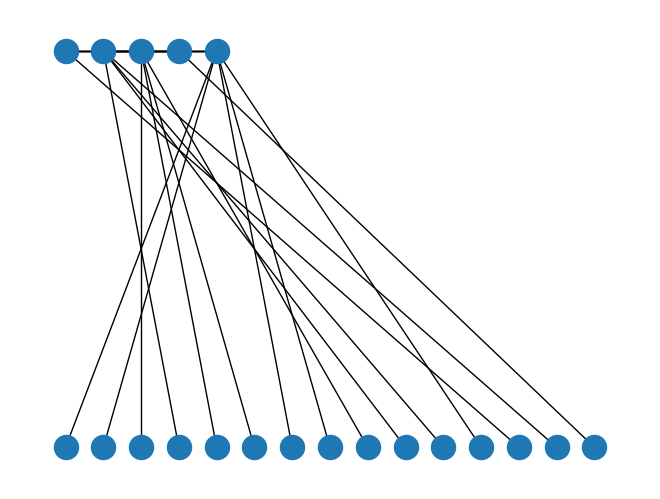

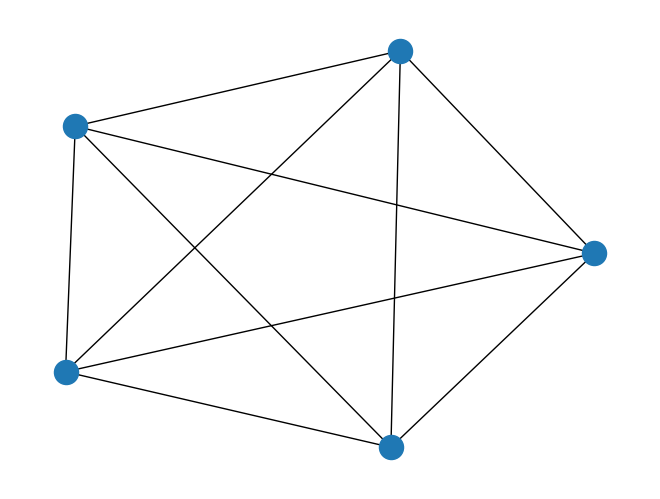

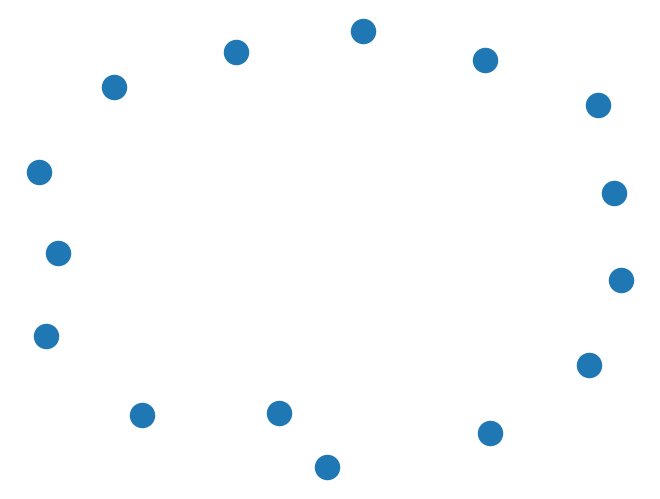

In [3]:
# Visualize a split graph.
plot_split_graph(G, C, P, draw_subgraphs=True)

In [4]:
# Find split graphs in a given graph.
splitGraphs = find_split_graphs(G)
foundGeneratedGraph = False
for s in splitGraphs:
    print_info(*s)
    if set(s[1]) == set(C) and set(s[2]) == set(P):
        foundGeneratedGraph = True
        print("-> Found the generated graph.")
assert foundGeneratedGraph, "Generated split graph could not be found"

Size of the split graph: 20
Core (size 5): {0, 1, 2, 3, 4} 
Periphery (size 15): {5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
-> Found the generated graph.
Size of the split graph: 7
Core (size 2): {4, 5} 
Periphery (size 5): {0, 6, 11, 12, 16}
Size of the split graph: 7
Core (size 2): {4, 6} 
Periphery (size 5): {0, 5, 11, 12, 16}
Size of the split graph: 7
Core (size 2): {11, 4} 
Periphery (size 5): {0, 5, 6, 12, 16}
Size of the split graph: 7
Core (size 2): {4, 12} 
Periphery (size 5): {0, 5, 6, 11, 16}
Size of the split graph: 7
Core (size 2): {16, 4} 
Periphery (size 5): {0, 5, 6, 11, 12}
Size of the split graph: 6
Core (size 2): {2, 7} 
Periphery (size 4): {0, 9, 10, 13}
Size of the split graph: 6
Core (size 2): {8, 1} 
Periphery (size 4): {0, 18, 14, 15}
Size of the split graph: 6
Core (size 2): {9, 2} 
Periphery (size 4): {0, 10, 13, 7}
Size of the split graph: 6
Core (size 2): {10, 2} 
Periphery (size 4): {0, 9, 13, 7}
Size of the split graph: 6
Core (size 2): {2, 1

### Split graphs in daily life
Here you can visualize a split graph example that occurs in daily life. Explain the insights you gain from this.

Size of the split graph: 4
Core (size 2): {'Judo6', 'Judo5'} 
Periphery (size 2): {'Judo8', 'Judo1'}
Size of the split graph: 5
Core (size 3): {'Judo6', 'Judo8', 'Judo7'} 
Periphery (size 2): {'Judo5', 'Judo4'}
Size of the split graph: 4
Core (size 3): {'Uni2', 'Uni1', 'Uni3'} 
Periphery (size 1): {'N'}
Size of the split graph: 4
Core (size 2): {'Judo8', 'Judo4'} 
Periphery (size 2): {'Judo6', 'Judo3'}
Size of the split graph: 5
Core (size 3): {'Judo2', 'Judo3', 'Judo4'} 
Periphery (size 2): {'Judo8', 'N'}
Size of the split graph: 4
Core (size 2): {'Judo5', 'Judo1'} 
Periphery (size 2): {'Judo6', 'N'}
Size of the split graph: 4
Core (size 2): {'Judo3', 'Judo7'} 
Periphery (size 2): {'Judo6', 'Judo4'}
Size of the split graph: 6
Core (size 2): {'Family1', 'N'} 
Periphery (size 4): {'Judo2', 'Family2', 'Uni1', 'Family3'}
Size of the split graph: 8
Core (size 3): {'Judo2', 'Judo1', 'N'} 
Periphery (size 5): {'Judo4', 'Judo5', 'Family2', 'Uni1', 'Family1'}
Size of the split graph: 6
Core (s

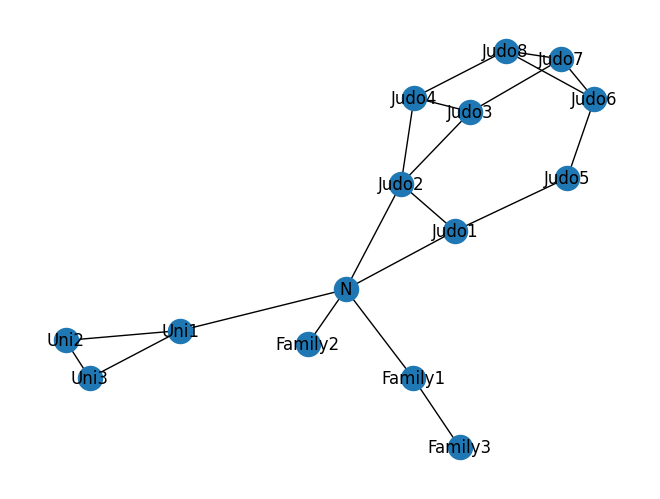

In [5]:
# Network models interaction longer than ten minutes, on a certain day, from N's point of view, in certain parts of his life
edges = [
    ('N', 'Judo1'), ('N', 'Judo2'), ('Judo1', 'Judo2'),
    ('Judo2', 'Judo3'), ('Judo2', 'Judo4'), ('Judo3', 'Judo4'),('Judo1', 'Judo5'),
    ('Judo5', 'Judo6'), ('Judo6', 'Judo7'), ('Judo6', 'Judo8'), ('Judo7', 'Judo8'),
    ('Judo4', 'Judo8'), ('Judo3', 'Judo7'), 
    ('N', 'Uni1'), ('Uni1', 'Uni2'), ('Uni2', 'Uni3'), ('Uni3', 'Uni1'),
    ('N', 'Family2'), ('N', 'Family1'), ('Family1', 'Family3')
]

G = nx.Graph()
G.add_edges_from(edges)

nx.draw(G, with_labels = True)

splitGraphs = find_split_graphs(G)
for s in splitGraphs:
    print_info(*s)

### Insights

- **Many cores contain `N`**: This is expected since the graph is built from `N`'s point of view. Naturally, `N` is involved in most interactions and appears frequently in the core of split graphs.

- **Cliques form around specific contexts**: Groups like **University (`Uni`)** and **Judo** naturally form tight-knit cores, reflecting strong, frequent interactions — which is typical for structured environments like school or sports.

## Exercise 2b: Matches and Covering.

This exercise is dedicated towards match relations and vertex covers in networks. By completing this exercise sheet, you first gain insights to the notion of matching relations and vertex cover by investigation real-world relationships. Next you cope with the computation of maximum matching relations/minumum vertex covers. For this you research for an algorithm, describe its functionality and test it in a small case study.


### Exercise 1:
* Describe a fictional network (description only), matching relation and vertex cover. 
* What real world relationship is modeled by your relation.
* Describe how you can generate a minimum vertex cover from a maximum matching relation (Hint: Koenig)

### Exercise 1

#### a) Fictional Network Description

We model a bipartite graph where:
- One set of vertices `U` represents **people**.
- The other set `W` represents **activities** (e.g., hiking, painting, cycling, gaming).
- An edge `(u, w)` means person `u` did activity `w` last weekend.

Meaning of **Matching** and **Vertex Cover** in later section

#### b) Real-World Relationship

This network models the relationship between people and activities they participated in over the weekend. It reflects many-to-one or one-to-one participation in shared events.

#### c) Finding a Minimum Vertex Cover from a Maximum Matching

Let `G = (V, E)` be a **bipartite graph** with bipartition `{U, W}`, and let `M` be a **maximum matching** in `G`.

To find a **minimum vertex cover** from `M`, use the following steps (based on **König’s Theorem**):

---

### Steps

1. Initialize a set `T` with all **unmatched vertices** in `U`.

2. From each vertex in `T`, follow **alternating paths**:
   - First, follow **unmatched edges** to vertices in `W`,
   - Then, follow **matched edges** back to vertices in `U`,
   - Add all such reachable vertices to `T`.

3. Repeat step 2 until **no new vertices** can be added to `T`.

4. The **minimum vertex cover** is: `(U \ T) ∪ (W ∩ T)`

#### Exercise 2:
* Research for an algorithm that can compute a maximum matching relation or a minimum vertex cover and provide the source of your algorithm
* describe how the algorithm works
* Implement the algorithm
* Implement a converter algorithm to generate a minimum vertex cover from of your computed maximum matching

Hopcroft–Karp algorithm; https://en.wikipedia.org/wiki/Hopcroft%E2%80%93Karp_algorithm

# Hopcroft–Karp Algorithm

- **Augmenting Path**: A path that starts and ends at unmatched vertices and alternates between unmatched and matched edges.

## Algo.:

1. **Initialization**: Start with an empty matching.

2. **Repeat until no augmenting paths exist**:
   - **Breadth-First Search (BFS)**: Construct a layered graph to find all shortest-length augmenting paths.
   - **Depth-First Search (DFS)**: Within the layered graph, find a maximal set of **vertex-disjoint** augmenting paths.
   - **Augmentation**: Increase the matching by flipping the matched/unmatched edges along all found augmenting paths.


In [ ]:
import networkx as nx

def hopcroft_karp(G):
    return nx.bipartite.maximum_matching(G)

In [7]:
import networkx as nx

def könig(G, M):
    return nx.bipartite.to_vertex_cover(G, M)

###  Small Case Study
* Provide a small network of at least 15 nodes of your daily life and describe it
* Compute a minimum vertex cover and a maximum matching relation of your network
* Describe what each covering can model.
* What insights to your network did you get from each covering?
* Visualize your network and covering relations in a reasonable manner (Hand drawn figure, LaTeX tikzpicture generated figure or networkx plot)

{'F': 'Movie', 'J1': 'Picnic', 'K': 'Party', 'N1': 'Dinner', 'N2': 'Trip', 'M': 'Learning', 'H': 'Gaming', 'Dinner': 'N1', 'Party': 'K', 'Picnic': 'J1', 'Gaming': 'H', 'Movie': 'F', 'Trip': 'N2', 'Learning': 'M'}
{'N2', 'M', 'F', 'H', 'J1', 'K', 'N1'}


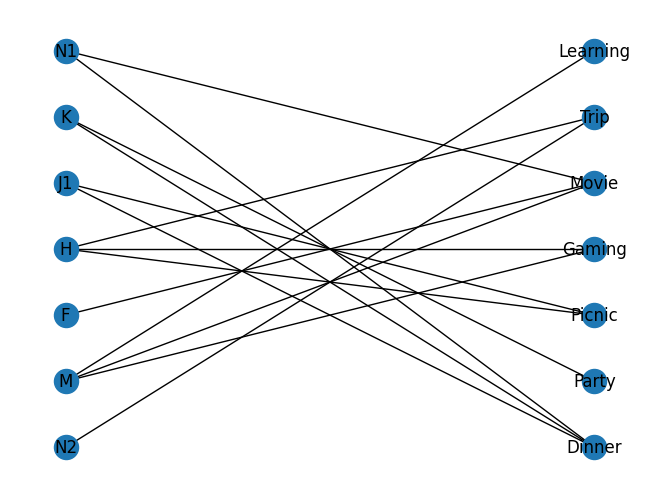

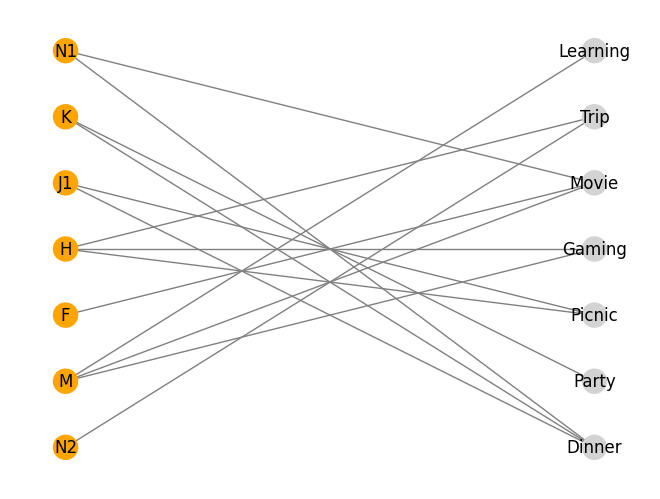

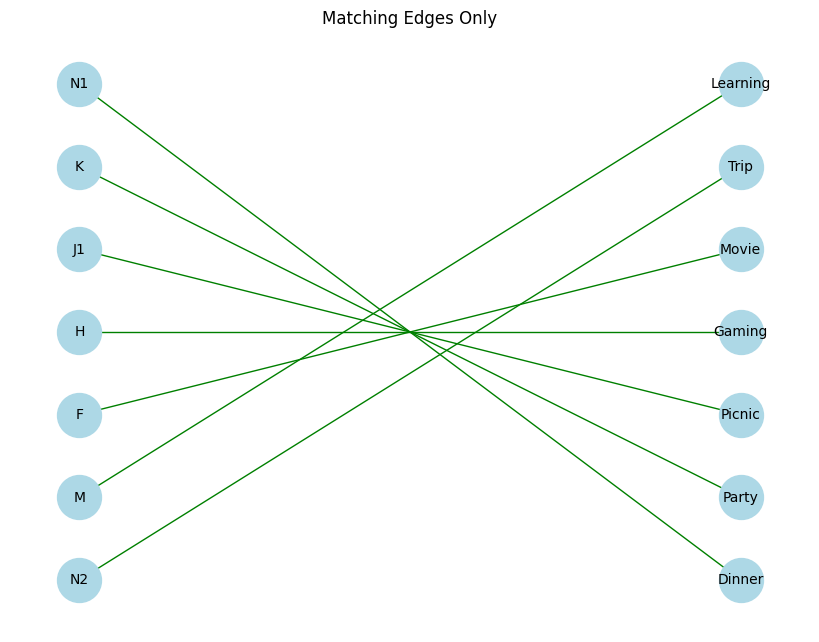

In [ ]:
import matplotlib.pyplot as plt

# Network models people and what activity they did last weekend
edges = [
    ('N1', 'Movie'), ('N1', 'Dinner'),
    ('M', 'Movie'), ('M', 'Gaming'), ('M', 'Learning'),
    ('J1', 'Dinner'), ('J1', 'Picnic'),
    ('N2', 'Trip'),
    ('H', 'Gaming'), ('H', 'Picnic'), ('H', 'Trip'),
    ('K', 'Party'), ('K', 'Dinner'),
    ('F', 'Movie'),
]

G = nx.Graph()
G.add_edges_from(edges)
U, V = {'N1', 'M', 'J1', 'N2', 'H', 'K', 'F'}, {'Movie', 'Dinner', 'Hangout', 'Learning', 'Gaming', 'Trip', 'Party', 'Picnic'}

pos = nx.bipartite_layout(G, U)

plt.figure(1)
nx.draw(G, pos, with_labels = True)

M = hopcroft_karp(G)
print(M)

VC = könig(G, M)
print(VC)

pos = nx.bipartite_layout(G, U)

plt.figure(2)
node_colors = ['orange' if n in VC else 'lightgray' for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray')

plt.figure(3, figsize=(8, 6))

matched_edges = [(u, v) for u, v in M.items() if u in U]
matched_nodes = set(sum(matched_edges, ()))
matching_subgraph = G.edge_subgraph(matched_edges).copy()

pos = {}
pos.update((n, (0, i)) for i, n in enumerate([n for n in U if n in matched_nodes]))
pos.update((n, (1, i)) for i, n in enumerate([n for n in V if n in matched_nodes]))

nx.draw(matching_subgraph, pos, with_labels=True, node_color='lightblue', edge_color='green', node_size=1000, font_size=10)
plt.title("Matching Edges Only")
plt.axis('off')
plt.show()

### Insights

**Insight Matching:** To ensure every activity is monitored or represented, everyone must be involved

**Insight Vertex Cover:** Everyone can each participate in a unique activity without conflicts, based on their preferences.